This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs_dataset_with_pts.csv")
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14095        3352386      0    683.0  45.0           36.0            36.0   
14096        3352563      0    863.0  34.0           54.0            54.0   
14097        3352747      0   1066.0  30.0           31.0            31.0   
14098        3353044      0   3338.0  52.0           41.0            41.0   
14099        3353077      0   1233.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  0.0                4.0      2.0               0  ...   
1                  0.0                4.0      4.0               1  ...   
2                  1.0                4.0      2.0               0  ...   
3                  1.0                4.0      4.0               1  ...   
4                  0.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
14095              0.0                2.0      2.0               0  ...   
14096              0.0                4.0      2.0               0  ...   
14097              0.0                4.0      4.0               0  ...   
14098              0.0                4.0      2.0               0  ...   
14099              0.0                4.0      4.0               0  ...   

      comorbidity_rheumd comorbidity_coag comorbidity_obes comorbidity_wloss  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
14095                  0                0                0                 0   
14096                  0                0                0                 0   
14097                  0                0                0                 0   
14098                  0                0                0                 0   
14099                  0                0                0                 0   

      comorbidity_fed comorbidity_blane comorbidity_dane comorbidity_alcohol  \
0                   0                 0                0                   0   
1                   0                 0                0                   0   
2                   0                 0                0                   0   
3                   0                 0                0                   0   
4                   0                 0                0                   1   
...               ...               ...              ...                 ...   
14095               0                 0                0                   0   
14096               0                 0                0                   0   
14097               0                 0                0                   0   
14098               1                 0                0                   0   
14099               0                 0                0                   0   

      comorbidity_drug comorbidity_depre  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
.

In [3]:
data = process_all(data)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14095        3352386      0    683.0  45.0           36.0            36.0   
14096        3352563      0    863.0  34.0           54.0            54.0   
14097        3352747      0   1066.0  30.0           31.0            31.0   
14098        3353044      0   3338.0  52.0           41.0            41.0   
14099        3353077      0   1233.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14095              0.0      2.0               0     1.0  ...   
14096              0.0      2.0               0     1.0  ...   
14097              0.0      4.0               0     0.0  ...   
14098              0.0      2.0               0     0.0  ...   
14099              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14095                  0                     0                              0   
14096                  0                     0                              0   
14097                  0                     0                              0   
14098                  0                     0                              0   
14099                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14095                     0                    0                   1   
14096                     0                    0                   1   
14097                     0                    0                   1   
14098                     0                    0                   1   
14099                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [4]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14095        3352386      0    683.0  45.0           36.0            36.0   
14096        3352563      0    863.0  34.0           54.0            54.0   
14097        3352747      0   1066.0  30.0           31.0            31.0   
14098        3353044      0   3338.0  52.0           41.0            41.0   
14099        3353077      0   1233.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14095              0.0      2.0               0     1.0  ...   
14096              0.0      2.0               0     1.0  ...   
14097              0.0      4.0               0     0.0  ...   
14098              0.0      2.0               0     0.0  ...   
14099              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14095                  0                     0                              0   
14096                  0                     0                              0   
14097                  0                     0                              0   
14098                  0                     0                              0   
14099                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14095                     0                    0                   1   
14096                     0                    0                   1   
14097                     0                    0                   1   
14098                     0                    0                   1   
14099                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [5]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_1hr_lead_1hr_obsHaloperidol", "relative_1hr_lead_1hr_obsPrecedex" ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [6]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [7]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

12322


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
15          200923.0  12885.0  79.0      84.000000              0.0      4.0   
18          213517.0  51425.0  49.0     117.000000              0.0      4.0   
26          242154.0   5580.0  46.0      77.000000              0.0      4.0   
27          242505.0   5840.0  90.0      78.000000              0.0      4.0   
28          246416.0   1314.0  89.0      65.000000              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
13986      3200031.0   3453.0  63.0      58.442771              0.0      4.0   
13987      3200331.0    673.0  23.0      79.000000              0.0      4.0   
13997      3328663.0  11215.0  48.0      77.000000              0.0      4.0   
14059      3343219.0    250.0  41.0      41.000000              0.0      2.0   
14085      3349777.0  21681.0  60.0      33.000000              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
15                1.0     1.0       162.60        99.20  ...   
18                1.0     1.0       188.00       130.50  ...   
26                0.0     1.0       157.48        53.09  ...   
27                0.0     1.0       165.10        61.80  ...   
28                0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
13986             1.0     1.0       165.00        72.50  ...   
13987             1.0     1.0       173.00        50.90  ...   
13997             0.0     1.0       170.10       109.30  ...   
14059             0.0     1.0       165.10        90.70  ...   
14085             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15                    0.0                    0.0   
18                    0.0                    0.0   
26                    0.0                    0.0   
27                    0.0                    0.0   
28                    0.0                    0.0   
...                   ...                    ...   
13986                 0.0                    0.0   
13987                 0.0                    0.0   
13997                 0.0                    0.0   
14059                 0.0                    0.0   
14085                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                               0.0                   0.0   
18                               1.0                   0.0   
26                               0.0                   0.0   
27                               0.0                   0.0   
28                               0.0                   0.0   
...                              ...                   ...   
13986                            0.0                   0.0   
13987                            0.0                   0.0   
13997                            0.0                   0.0   
14059                            0.0                   0.0   
14085                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                     1.0                 0.0                   1.0   
18                     0.0                 1.0                   0.0   
26                     0.0                 1.0                   0.0   
27                     0.0                 1.0                   0.0   
28                     0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
13986                  0.0                 0.0                   0.0   
13987                  0.0                 1.0                   0.0   
13997                  0.0                 1.0                   0.0   
14059                  0.0                 1.0                   0.0   
14085                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [8]:
print(np.sum(labels==1))

2640


In [9]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
15          200923.0   2.518590  0.911930       1.006284        -0.340323   
18          213517.0  12.089854 -0.904197       2.330212        -0.340323   
26          242154.0   0.704421 -1.085810       0.725451        -0.340323   
27          242505.0   0.768991  1.577843       0.765570        -0.340323   
28          246416.0  -0.355024  1.517305       0.244023        -0.340323   
...              ...        ...       ...            ...              ...   
13986      3200031.0   0.176189 -0.056671      -0.019047        -0.340323   
13987      3200331.0  -0.514214 -2.478173       0.805689        -0.340323   
13997      3328663.0   2.103852 -0.964734       0.725451        -0.340323   
14059      3343219.0  -0.619264 -1.388497      -0.718834        -0.340323   
14085      3349777.0   4.703044 -0.238284      -1.039786        -0.340323   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
15     0.861286        1.133496  1.058863    -0.333639     0.552639  ...   
18     0.861286        1.133496  1.058863     1.069271     1.705793  ...   
26     0.861286       -0.882226  1.058863    -0.616430    -1.146146  ...   
27     0.861286       -0.882226  1.058863    -0.195557    -0.825252  ...   
28     0.861286       -0.882226 -0.944409     0.505898    -0.338938  ...   
...         ...             ...       ...          ...          ...  ...   
13986  0.861286        1.133496  1.058863    -0.201080    -0.431043  ...   
13987  0.861286        1.133496  1.058863     0.240781    -1.226830  ...   
13997  0.861286       -0.882226  1.058863     0.080606     0.924743  ...   
14059 -1.722840       -0.882226  1.058863    -0.195557     0.239482  ...   
14085  0.861286       -0.882226 -0.944409     0.787585     0.103166  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15              -0.279188              -0.040321   
18              -0.279188              -0.040321   
26              -0.279188              -0.040321   
27              -0.279188              -0.040321   
28              -0.279188              -0.040321   
...                   ...                    ...   
13986           -0.279188              -0.040321   
13987           -0.279188              -0.040321   
13997           -0.279188              -0.040321   
14059           -0.279188              -0.040321   
14085           -0.279188              -0.040321   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                         -0.215533             -0.229592   
18                          4.639667             -0.229592   
26                         -0.215533             -0.229592   
27                         -0.215533             -0.229592   
28                         -0.215533             -0.229592   
...                              ...                   ...   
13986                      -0.215533             -0.229592   
13987                      -0.215533             -0.229592   
13997                      -0.215533             -0.229592   
14059                      -0.215533             -0.229592   
14085                      -0.215533             -0.229592   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                6.732259           -2.736097              4.035085   
18               -0.148539            0.365484             -0.247826   
26               -0.148539            0.365484             -0.247826   
27               -0.148539            0.365484             -0.247826   
28               -0.148539            0.365484             -0.247826   
...                    ...                 ...                   ...   
13986            -0.148539           -2.736097             -0.247826   
13987            -0.148539            0.365484             -0.247826   
13997            -0.148539            0.365484             -0.247826   
14059            -0.148539            0.365484             -0.247826   
14085  

# Visualize Data

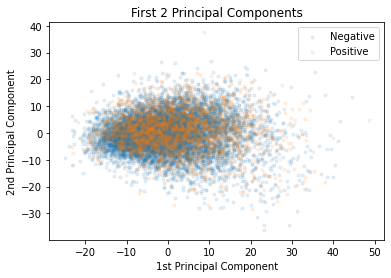

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [11]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


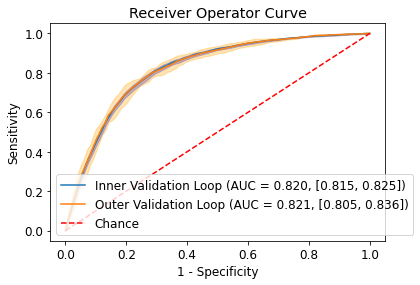

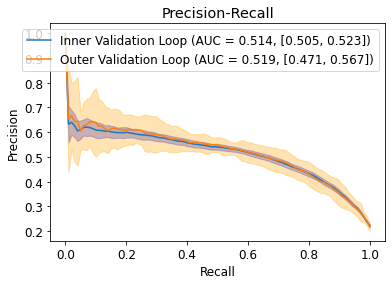

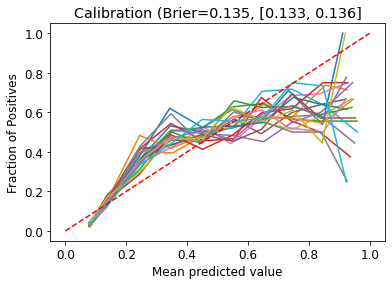

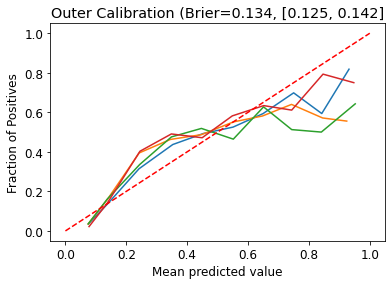

In [12]:
result_dict = lr_calibrated
name = "relative_1hr_lead_1hr_obs/mean_unpruned_pts/lr_calibrated"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [14]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl", "wb") as f:
    pickle.dump(selected_feat, f)

84
LOS
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
HistAngina
HistCABG
HistPulmEmb
HistDementia
HistSeizures
relative_1hr_lead_1hr_obsAdrenergicBronchodilators
relative_1hr_lead_1hr_obsaminoglycosides
relative_1hr_lead_1hr_obsAnticholinergicBronchodilators
relative_1hr_lead_1hr_obsAnticoagulants
relative_1hr_lead_1hr_obsBenzodiazepines
relative_1hr_lead_1hr_obsCephalosporins
relative_1hr_lead_1hr_obsGeneralAnesthetics
relative_1hr_lead_1hr_obsGlycopeptides
relative_1hr_lead_1hr_obsH2Blockers
relative_1hr_lead_1hr_obsLaxatives
relative_1hr_lead_1hr_obsLincomycins
relative_1hr_lead_1hr_obsMacrolides
relative_1hr_lead_1hr_obsPenicillins
relative_1hr_lead_1hr_obsPhenylpiperazineAntidepressants
relative_1hr_lead_1hr_obsProtonPumpInhibitor
relative_1hr_lead_1hr_obsSodiumChannelBlockers
relative_1hr_lead_1hr_obsSSRIAntidepressants
relative_1hr_lead_1hr_obsThrombolytics
last_BUN
last_chloride
last_MCV
last_RBC
last_sodium
last_WBC x 1000
hr_value__cwt_coefficients__coeff_0__w_10__widths_(

In [15]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "wb") as f:
    pickle.dump(dropped_feat, f)

sCalciumChannelBlockers
relative_1hr_lead_1hr_obsCarbapenems
relative_1hr_lead_1hr_obsClassVAntiarrhythmics
relative_1hr_lead_1hr_obsColloidFluids
relative_1hr_lead_1hr_obsCrystalloidFluids
relative_1hr_lead_1hr_obsDiuretics
relative_1hr_lead_1hr_obsGlucocorticoids
relative_1hr_lead_1hr_obsGlucoseElevating
relative_1hr_lead_1hr_obsInsulins
relative_1hr_lead_1hr_obsMAOIAntidepressants
relative_1hr_lead_1hr_obsMethylxanthines
relative_1hr_lead_1hr_obsMiscAntidepressants
relative_1hr_lead_1hr_obsNeuromuscularBlockers
relative_1hr_lead_1hr_obsNSAIDs
relative_1hr_lead_1hr_obsOpioids
relative_1hr_lead_1hr_obsPotassiumChannelBlockers
relative_1hr_lead_1hr_obsQuinolones
relative_1hr_lead_1hr_obsSNRIAntidepressants
relative_1hr_lead_1hr_obsSomatostatin
relative_1hr_lead_1hr_obsSulfonamides
relative_1hr_lead_1hr_obsTetracyclicAntidepressants
relative_1hr_lead_1hr_obsTetracyclines
relative_1hr_lead_1hr_obsTricyclicAntidepressants
relative_1hr_lead_1hr_obsVasodilators
relative_1hr_lead_1hr_obsVaso

In [10]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [17]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

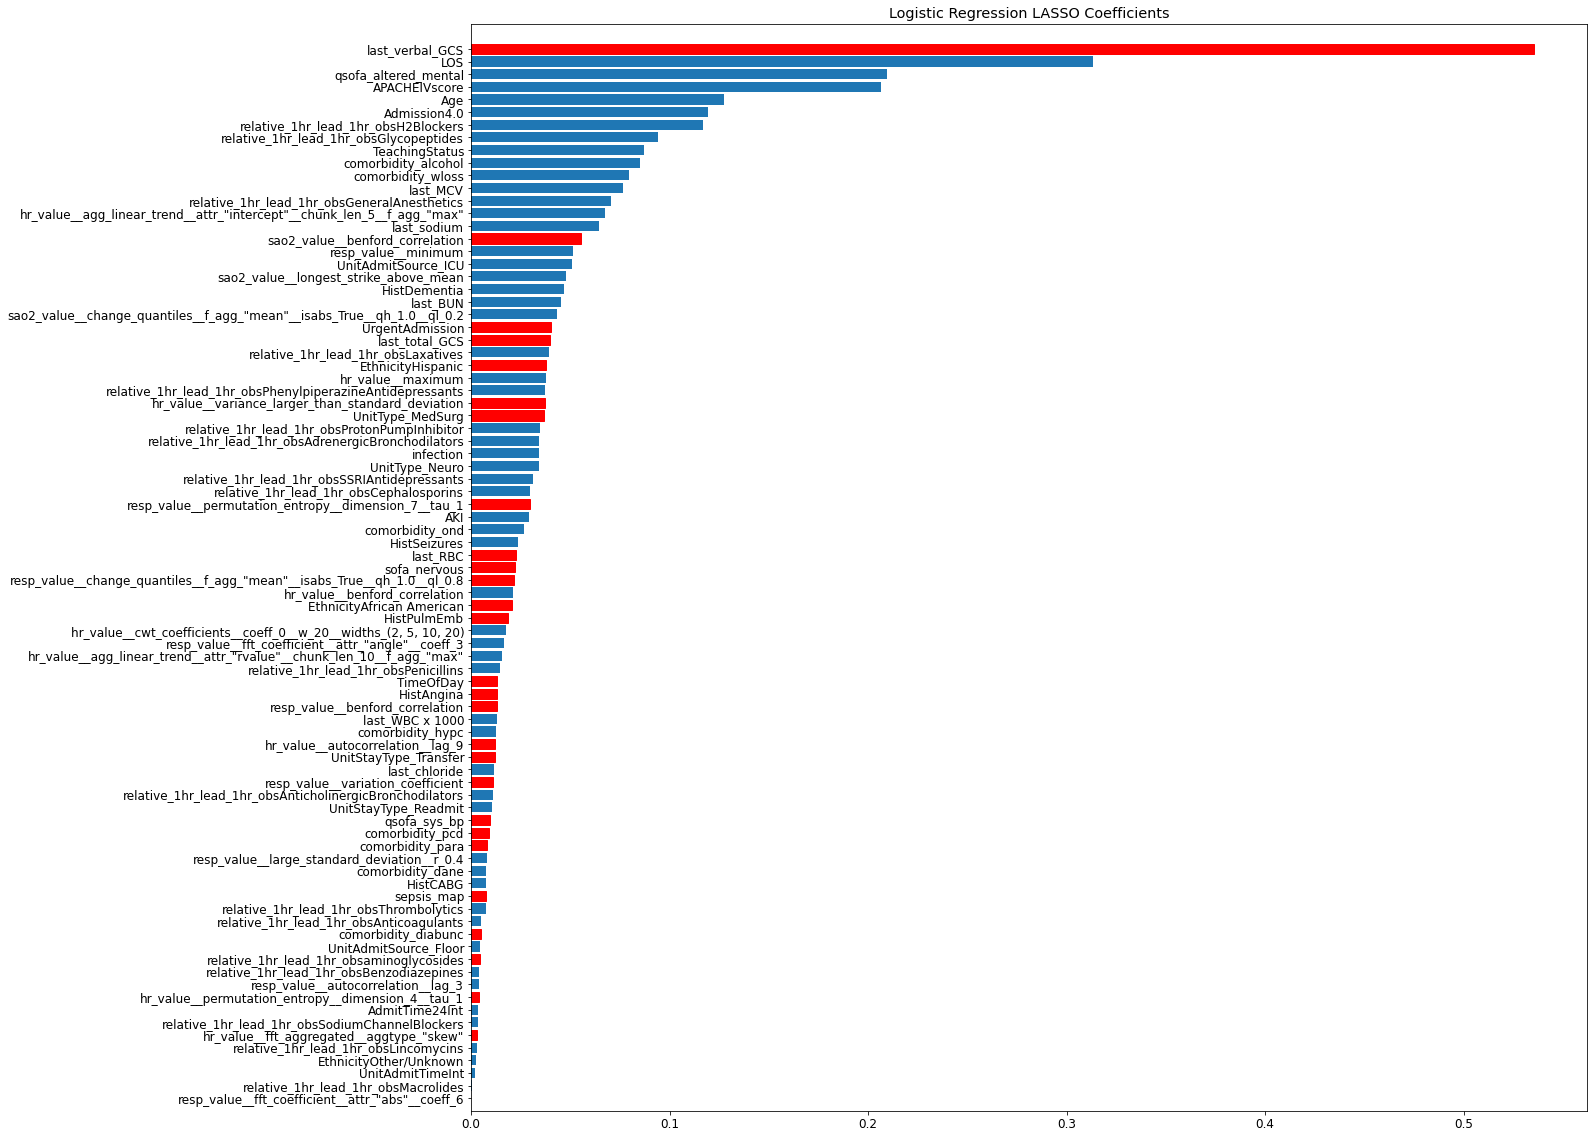

In [18]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

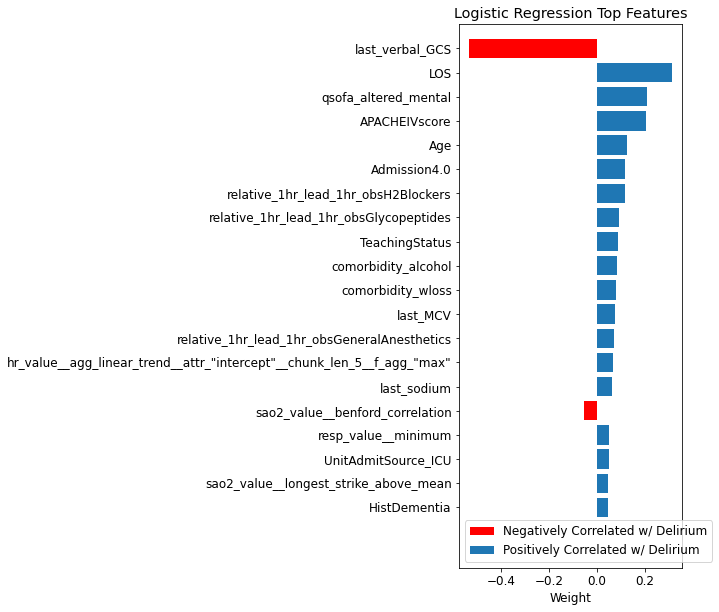

In [19]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_1hr_lead_1hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png', dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

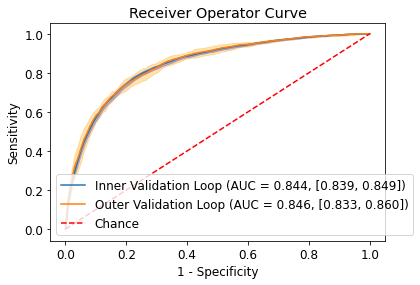

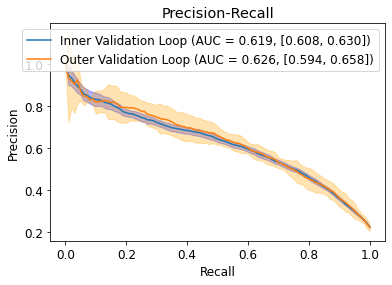

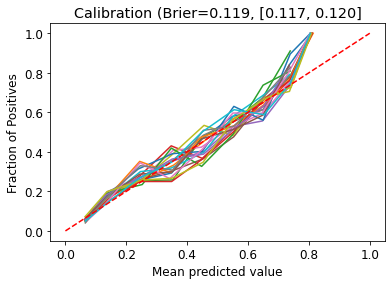

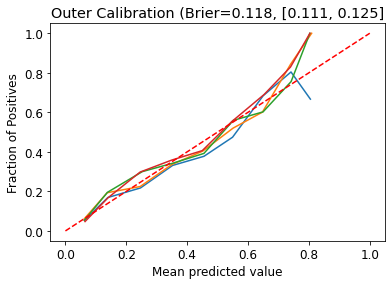

Learning rate set to 0.010993
0:	learn: 0.6897706	total: 717ms	remaining: 35m 50s
1:	learn: 0.6860642	total: 748ms	remaining: 18m 40s
2:	learn: 0.6827494	total: 799ms	remaining: 13m 18s
3:	learn: 0.6796712	total: 834ms	remaining: 10m 24s
4:	learn: 0.6762175	total: 856ms	remaining: 8m 32s
5:	learn: 0.6729556	total: 885ms	remaining: 7m 21s
6:	learn: 0.6699252	total: 915ms	remaining: 6m 31s
7:	learn: 0.6667235	total: 937ms	remaining: 5m 50s
8:	learn: 0.6638683	total: 956ms	remaining: 5m 17s
9:	learn: 0.6606442	total: 983ms	remaining: 4m 53s
10:	learn: 0.6574817	total: 1s	remaining: 4m 32s
11:	learn: 0.6547258	total: 1.02s	remaining: 4m 14s
12:	learn: 0.6520731	total: 1.04s	remaining: 3m 58s
13:	learn: 0.6495589	total: 1.06s	remaining: 3m 45s
14:	learn: 0.6470770	total: 1.08s	remaining: 3m 34s
15:	learn: 0.6444559	total: 1.1s	remaining: 3m 25s
16:	learn: 0.6420817	total: 1.14s	remaining: 3m 20s
17:	learn: 0.6395919	total: 1.16s	remaining: 3m 11s
18:	learn: 0.6371565	total: 1.18s	remaining:

KeyboardInterrupt: 

In [20]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

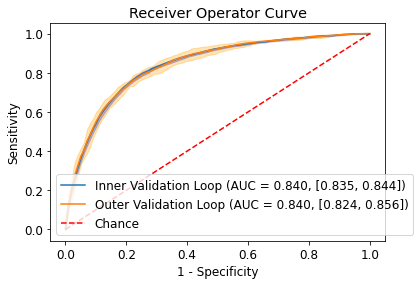

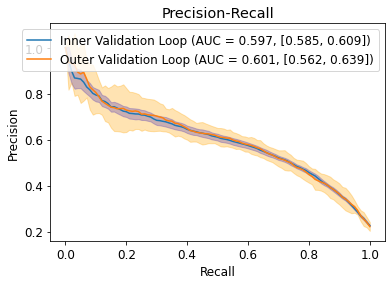

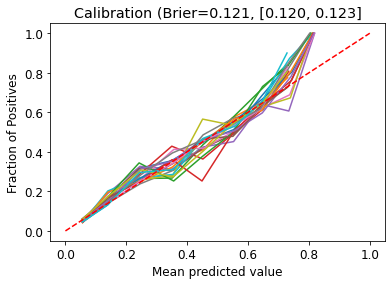

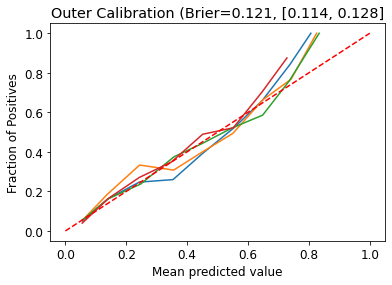

In [12]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

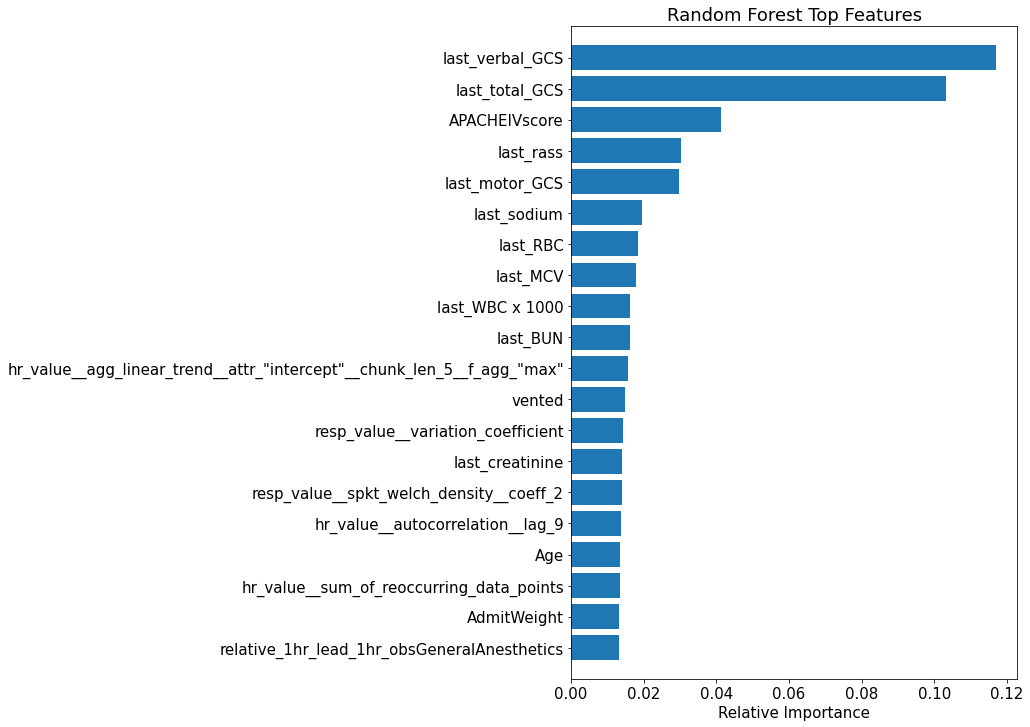

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

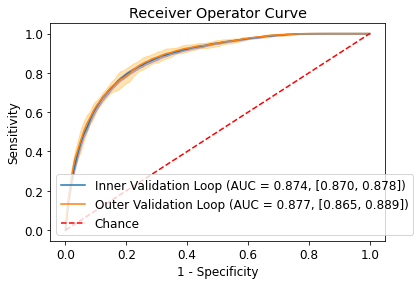

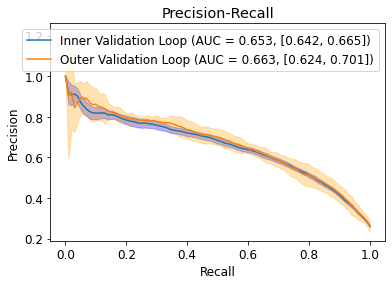

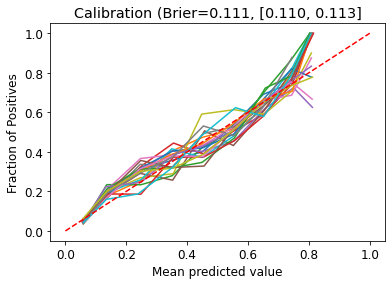

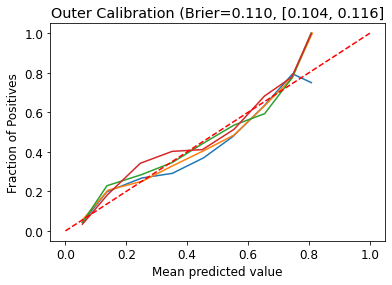

In [12]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

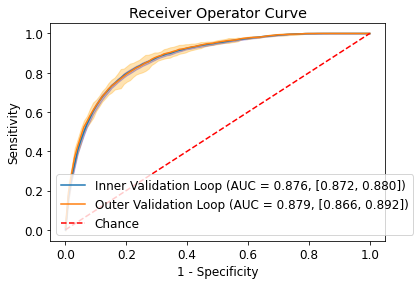

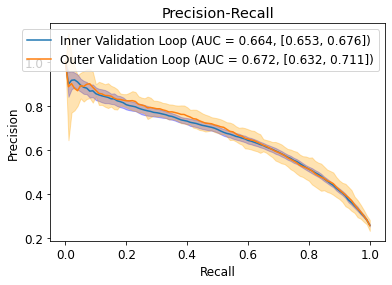

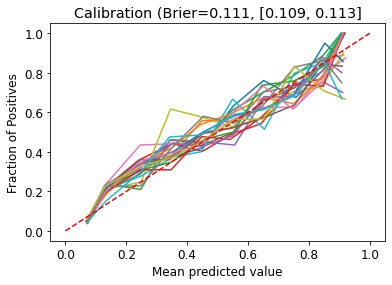

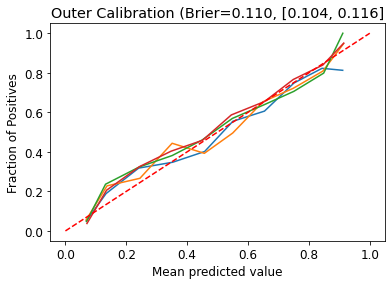

In [13]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

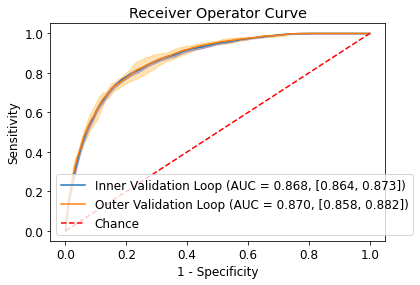

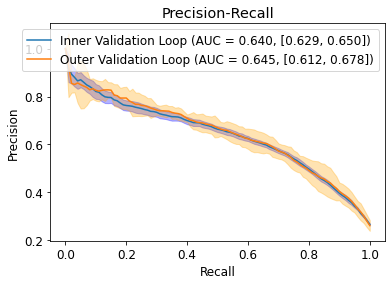

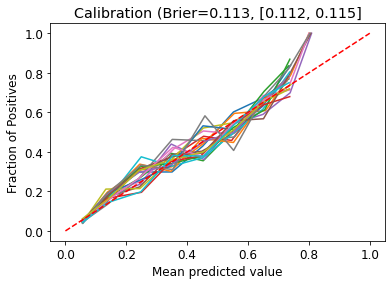

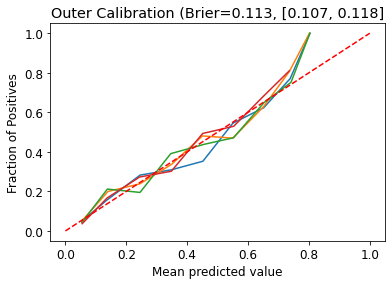

In [14]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned_pts/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned_pts/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

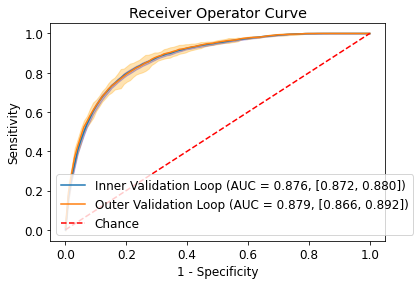

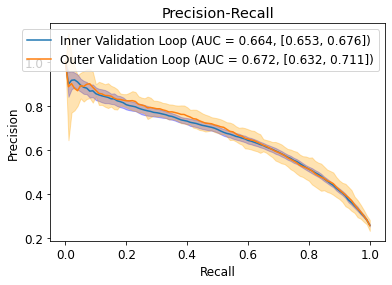

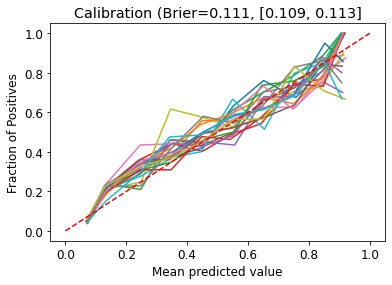

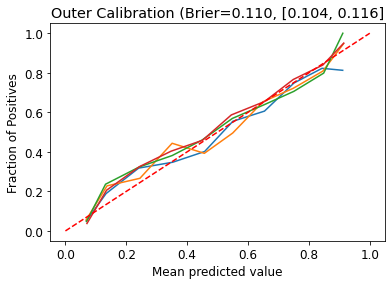

In [15]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned_pts/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")